# Background and Context
The company "Visit with us" wants to expand customer base and want to launch a new product. Currently, there offer 5 packages- Basic, Standard, Deluxe, Super Deluxe, King. The 

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The new prouct, they are planning to launch, Wellness Tourism Package. This peckage will offer the traveler to maintain, enhance or kick-start a healthy lifestyle, and as well as will support or increase customer's sense of well-being.

Because of last campaign's huge marketing cost, they are focusing more on eficient marketing cost based on available data of present and future customers.


Main Objective:

- To predict which customer is more likely to purchase the newly introduced travel package.
- Build a customer profile
- identifying the features, which have more impact on making the decision

Data Dictionary

Customer details:

CustomerID: Unique customer ID
ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
Age: Age of customer
TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
Occupation: Occupation of customer
Gender: Gender of customer
NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
PreferredPropertyStar: Preferred hotel property rating by customer
MaritalStatus: Marital status of customer
NumberOfTrips: Average number of trips in a year by customer
Passport: The customer has a passport or not (0: No, 1: Yes)
OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
Designation: Designation of the customer in the current organization
MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 
PitchSatisfactionScore: Sales pitch satisfaction score
ProductPitched: Product pitched by the salesperson
NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
DurationOfPitch: Duration of the pitch by a salesperson to the customer

# Importing the necessary libraries and loading the data

In [2]:
#Importing the libraries for loading the data
import pandas as pd
import numpy as np
#Importing the libraries for visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Importing the libraries for the model building, and different classifiers for classification and performance testing on the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [15]:
#loading the dataset and converting into csv file
tour=pd.read_excel(r"C:\Users\HP\Downloads\Tourism.xlsx", sheet_name="Tourism")
tourb=tour.copy()
tourb.to_csv(r"C:\Users\HP\Downloads\Tourism.csv", index=None, header=True)

In [16]:
#Getting the first impression on the data by loading the five rows from the data
tourb.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
#The available columns from the dataset
tourb.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [18]:
#Finding the number of total columns and rows in the data
tourb.shape

(4888, 20)

In [19]:
#the data types in the data
tourb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- There are few columns: TypeofCOntact, Occupation, Gender etc. have object data types, these should be changed
- Customer ID, ProductTaken, CityTier etc. have also wrong data type, should be dealt
- As first impression, there are missing values in different columns, like Age, DuratioOfPitch, NumberOfFOllowups etc. These should be dealt also in later part of analysis.

In [20]:
#Describing the data, mean, maxvalue, minvalue, standard deviation etc. 
tourb[["Age", "DurationOfPitch", "NumberOfPersonVisiting", "NumberOfFollowups", "NumberOfTrips", "NumberOfChildrenVisiting", "MonthlyIncome"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


Few quicking observations from the data:
- In generally, data looks normal,
- Mean age is between 37  and 38
- Number of Followups have mean with 3.7
- The average numeroftrips is 3, however there is maximum value with 22
- Number of Children Visiting has mean value with 1.18
- However, in the monthly income, there is huge difference between min and max value. It gives the indication, there are outliers in the data

In [21]:
#Checking the number of missing values in the data
tourb.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

- In few columns, Age, TypeofContact, Durationofpitch, Numberoffollowups, Preferredpropertystar, Numberoftrips, numberofchildrenvisiting and monthlyincome, there are missing values.
- In general, portion of missing values not so high, the highes number, Duration of Pitch has around 5 Percent of missing data in comparison of total number of ovservation

In [24]:
cat_cols=['ProdTaken','TypeofContact','CityTier','Occupation','Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

for column in cat_cols:
    print(tourb[column].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
------------------------------
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
3.0    2993
5.0     

In [25]:
#Dropping the CustomerID Column 
tourb.drop(columns=['CustomerID'], inplace=True)

# Exploratory Data Analysis

# Univariate Analysis

In [27]:
#Function to create histplot and boxplot together
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

##### Observation on Age column

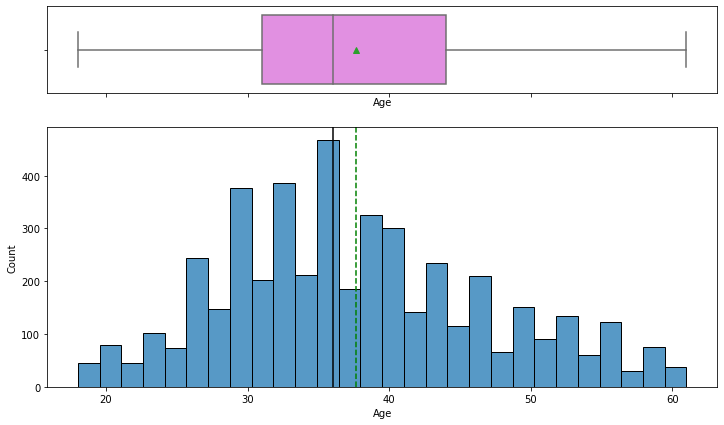

In [28]:
histogram_boxplot(tourb, "Age")

- This distribution looks normal.
- There is no outliers

##### Observation on Durationofpitch column

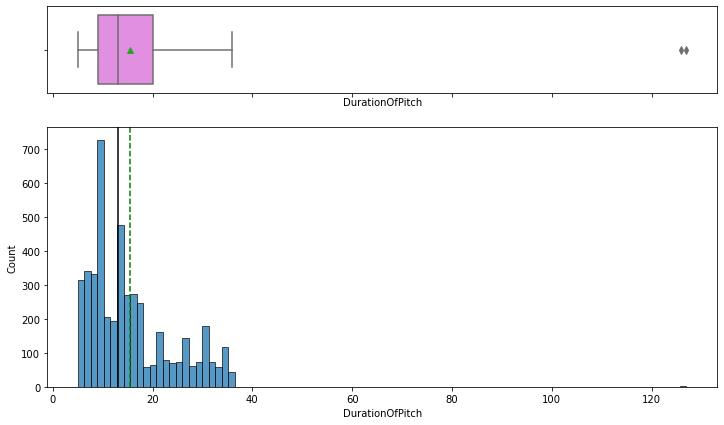

In [29]:
histogram_boxplot(tourb, "DurationOfPitch")

- There are most data in range with few outliers. To my opinion, there will be insignificant impact on analysis.

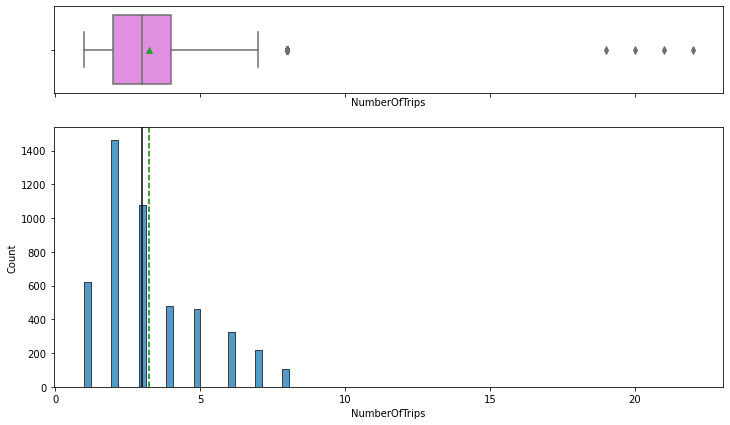

In [30]:
histogram_boxplot(tourb, "NumberOfTrips")

- There are also few outliers. However, the most of the data within the range.

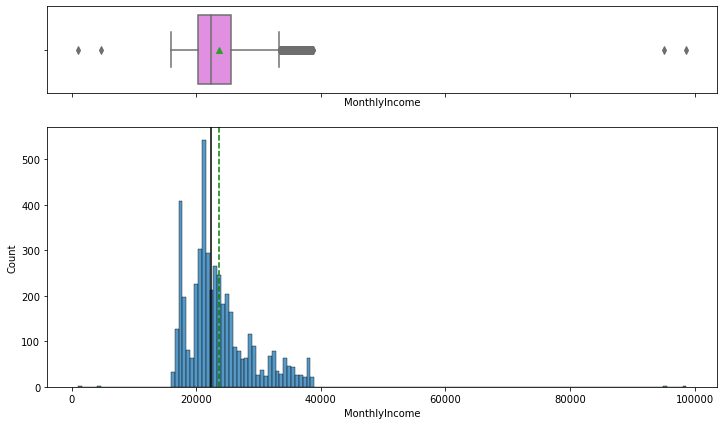

In [31]:
histogram_boxplot(tourb, "MonthlyIncome")

- Though there are many outliers are visible, the distribution of the data is not drastically problematic, the mean, median and mode are close with one another, centering around 20000-25000

In [32]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##### Barplot of ProdTaken

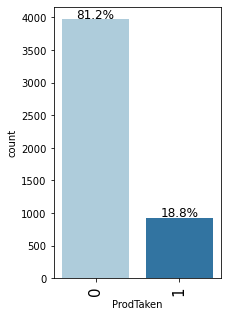

In [34]:
labeled_barplot(tourb, "ProdTaken", perc=True)

- There are imbalance in the data, most of them 81 Percent has not bought the product

##### Barplot of TypeofCOntact

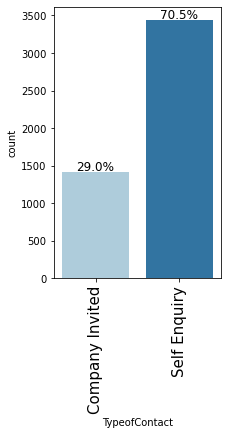

In [33]:
labeled_barplot(tourb, "TypeofContact", perc=True)

- Most of the quiry, 70 Percent came from Self Enquiry

##### Barplot of CityTier

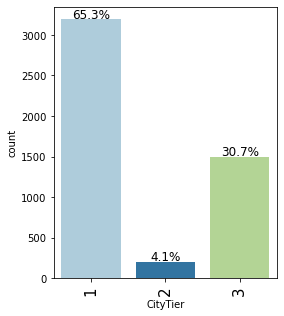

In [72]:
labeled_barplot(tourb, "CityTier", perc=True)

-Majority from CityTier 1 65 Percent, and very few from CityTier 2

##### Barplot of Occupation

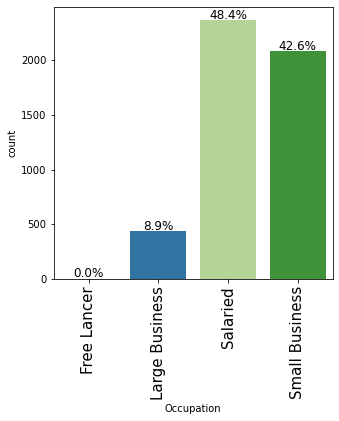

In [73]:
labeled_barplot(tourb, "Occupation", perc=True)

- Respondents came from mainly from Salaried and Small Business categories

##### Barplot of Gender

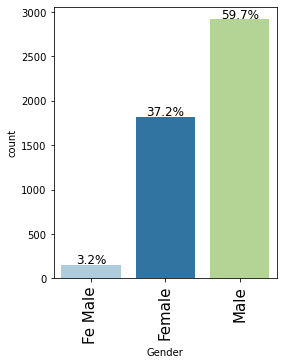

In [35]:
labeled_barplot(tourb, "Gender", perc=True)

- Male is the biggest category with 60 Percent

##### Barplot of ProductPitched

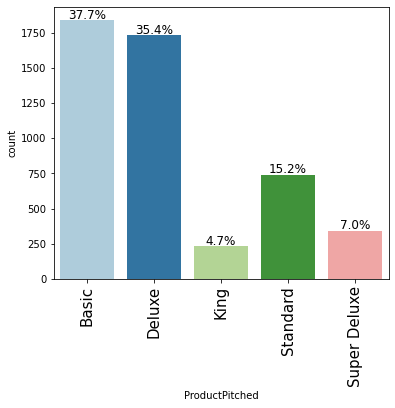

In [36]:
labeled_barplot(tourb, "ProductPitched", perc=True)

- Basic and Delux, these two categories of product Picthed by the sales person

##### Barplot of PreferredPropertyStar

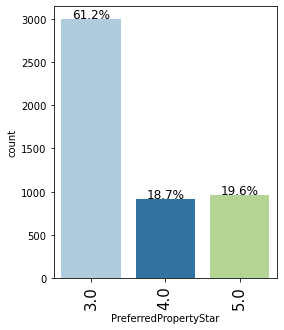

In [77]:
labeled_barplot(tourc, "PreferredPropertyStar", perc=True)

- Mostly 3 Star property are preferred by the 61 percent of respondents

##### Barplot of MaritalStatus

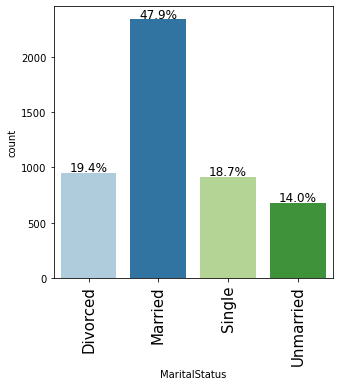

In [78]:
labeled_barplot(tourc, "MaritalStatus", perc=True)

- 48 Percent of are married

##### Barplot of Passport

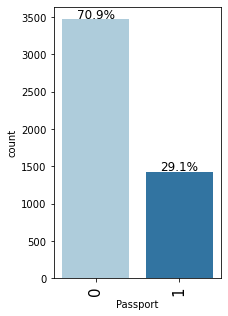

In [79]:
labeled_barplot(tourc, "Passport", perc=True)

- 30 percent have passport

##### Barplot of PitchSatisfactionScore

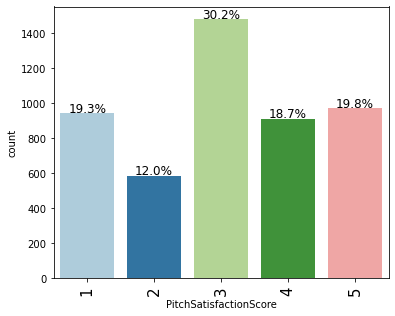

In [81]:
labeled_barplot(tourc, "PitchSatisfactionScore", perc=True)

- Modearate is highest percentage with 30.2 percent. 

##### Barplot of NumberofFOlowups

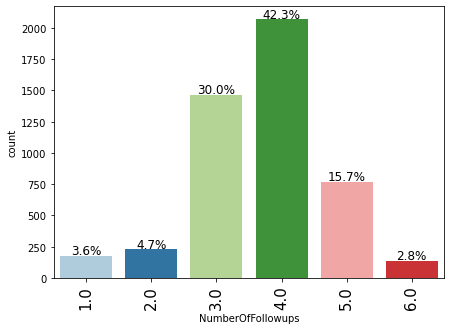

In [39]:
labeled_barplot(tourb, "NumberOfFollowups", perc=True)

- In major cases, 4 is the higher number of followups done by the salesperson 

##### Barplot of NumberOfChildrenVisiting

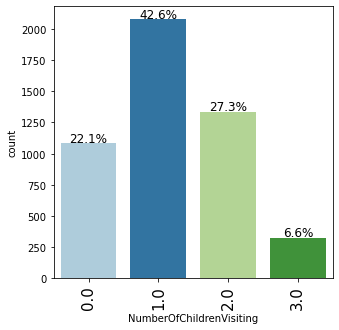

In [41]:
labeled_barplot(tourb, "NumberOfChildrenVisiting", perc=True)

- Most of them are with 1 child with 42 percent. 

##### Barplot of NumberOfTrips

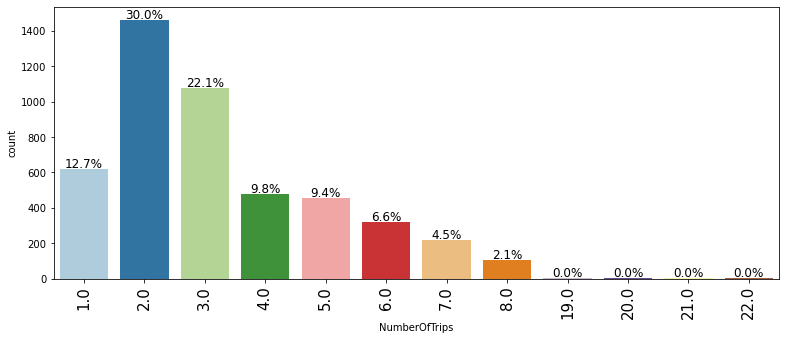

In [42]:
labeled_barplot(tourb, "NumberOfTrips", perc=True)

- Averagly, the customer have 2 trips in a year by 30 percent.
- There are outliers, who have more than 20 visits, they are non significant in percentage, as it was assumed.

##### Barplot of NumberOfPersonVisiting

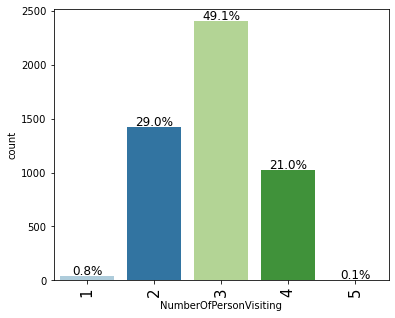

In [43]:
labeled_barplot(tourb, "NumberOfPersonVisiting", perc=True)

- On average, 3 person is the most common size with 49 percent

##### Barplot of Owncar

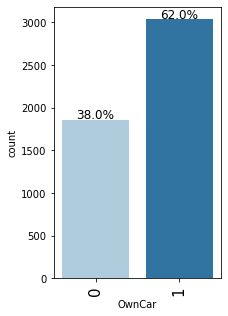

In [38]:
labeled_barplot(tourb, "OwnCar", perc=True)

- 62 Percent have own car

##### Barplot of Designation

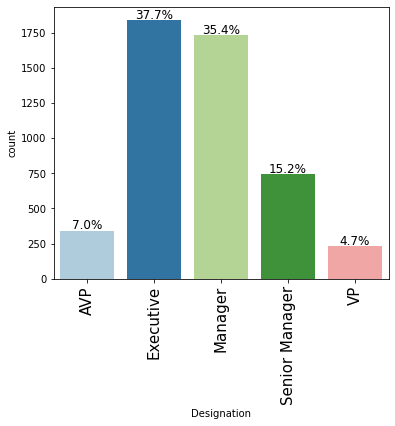

In [37]:
labeled_barplot(tourb, "Designation", perc=True)

- Executive an Manager are the major categories, with 38 and 35 Percent respectively

# Bivariate Analysis

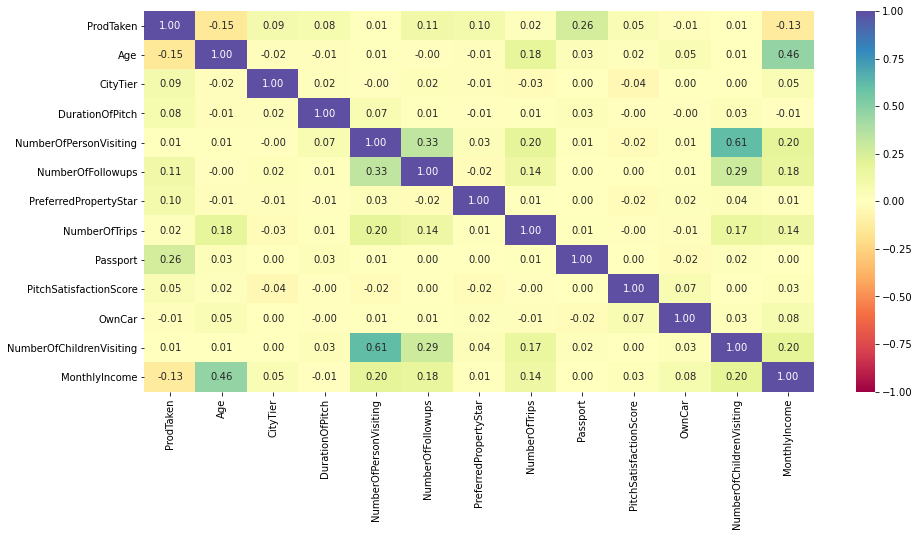

In [52]:
plt.figure(figsize=(15, 7))
sns.heatmap(tourb.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- In general, variables are not higly correlated with one another.
- There is more than average correlation between Numberofchildrenisting with numberofpersonvisiting 
- HOwever, for classification problem, high correlation among variables does not have big impact. Therefore, it is not needed to drop any high correlated variable

In [54]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

##### Tyoeofcontact with prodtaken

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


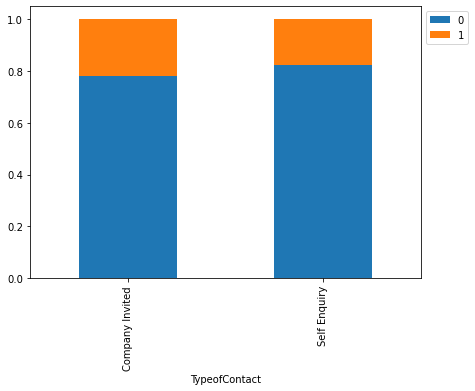

In [55]:
stacked_barplot(tourb, "TypeofContact", "ProdTaken")

- More prodtaken is from company invited than self enquiry

##### CityTier with Prodtaken

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


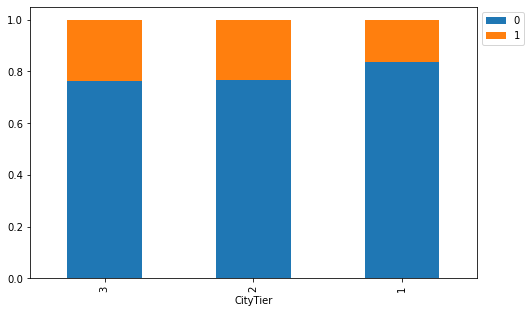

In [56]:
stacked_barplot(tourb, "CityTier", "ProdTaken")

- Citytier 3 has better percentage to buy the product

##### Gender with Prodtaken

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1500  317  1817
Fe Male     130   25   155
------------------------------------------------------------------------------------------------------------------------


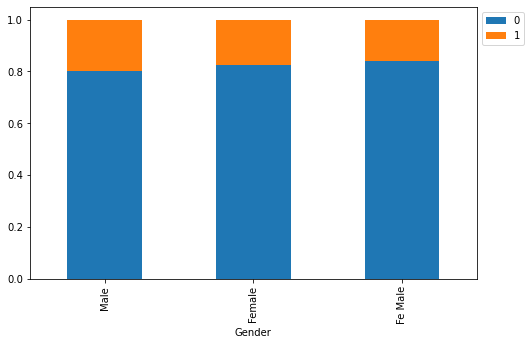

In [57]:
stacked_barplot(tourb, "Gender", "ProdTaken")

- Male have more product bought than female

##### Occupation with Prodtaken

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


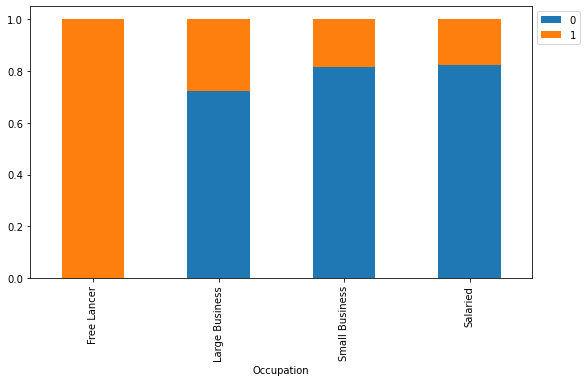

In [64]:
stacked_barplot(tourb, "Occupation", "ProdTaken")

- Though the Free lance looks very lucrative, as they are 100 percent bought, however they are not representative, as they are only 2 samples.
- Large Business have bought more product than other categories

##### Numberofpersonvisiting with Prodtaken

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


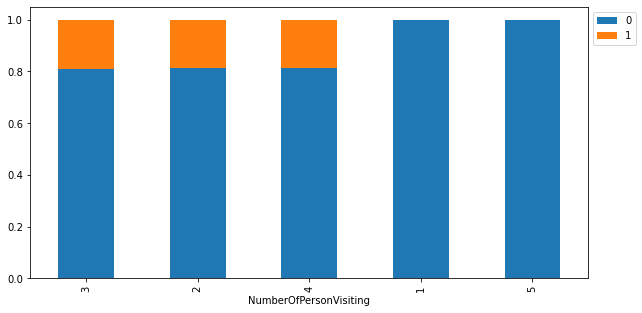

In [58]:
stacked_barplot(tourb, "NumberOfPersonVisiting", "ProdTaken")

- 3, 4 and 5 persons are visiting almost have the similar reponse. However, 5 person are visiting nonrepresentative, as they are only 3 among all data.

##### NUmberoffollowups with Prodtaken

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


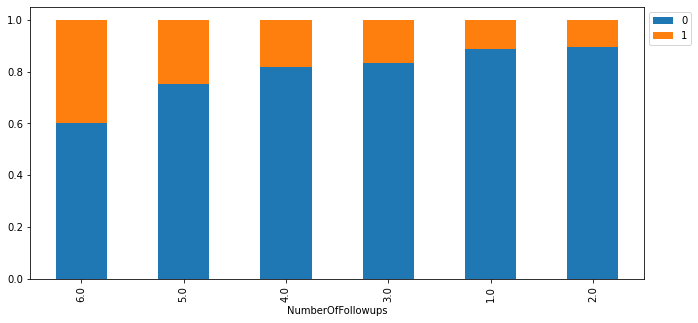

In [63]:
stacked_barplot(tourb, "NumberOfFollowups", "ProdTaken")

- It is visible, more followups, and more possibility to buy the product.

##### Productpitched with Prodtaken

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


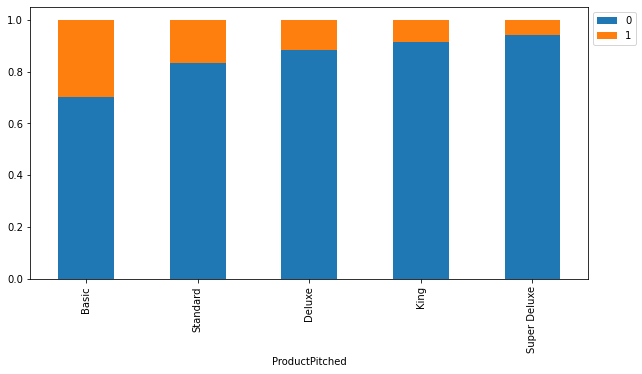

In [62]:
stacked_barplot(tourb, "ProductPitched", "ProdTaken")

- Basic is the best among all pitched product categories. 

##### PreferredPropertyStar with Prodtaken

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


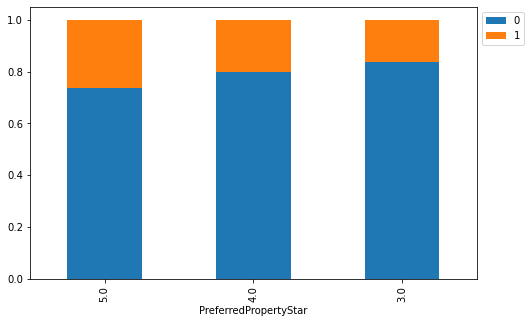

In [61]:
stacked_barplot(tourb, "PreferredPropertyStar", "ProdTaken")

- As preferred property star, 5 has more prospects comparitavley

##### MaritalStatus with Prodtaken

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


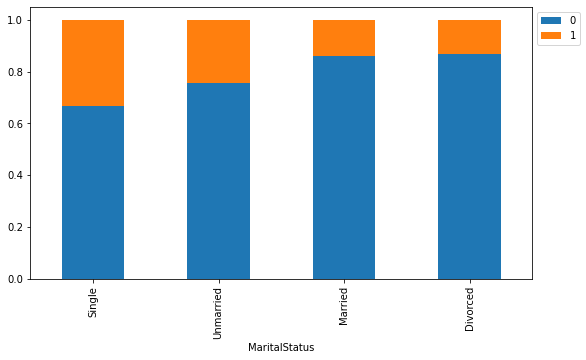

In [60]:
stacked_barplot(tourb, "MaritalStatus", "ProdTaken")

- Single and unmarried have better ratio to buy the product 

##### Numberoftrips with prodtaken

ProdTaken         0    1   All
NumberOfTrips                 
All            3840  908  4748
2.0            1165  299  1464
3.0             862  217  1079
1.0             508  112   620
6.0             258   64   322
5.0             396   62   458
7.0             156   62   218
4.0             417   61   478
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


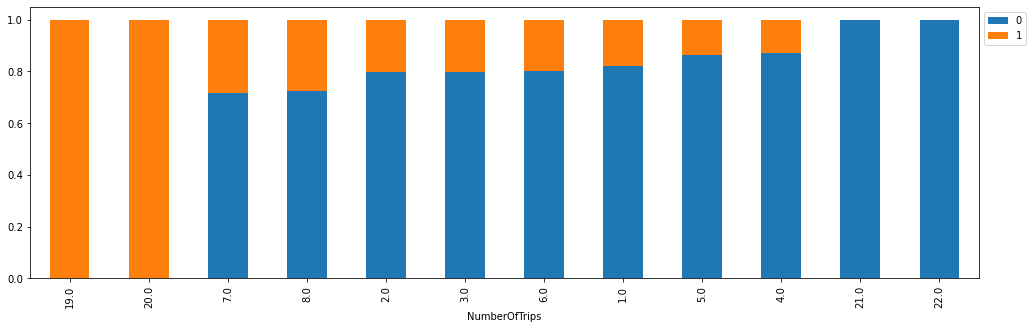

In [59]:
stacked_barplot(tourb, "NumberOfTrips", "ProdTaken")

- Generally, data tends to, who has taken more trip, buy more products, however, 19, 20 , they are not representative, as they are not many in number

##### Passport wit Prodtaken

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


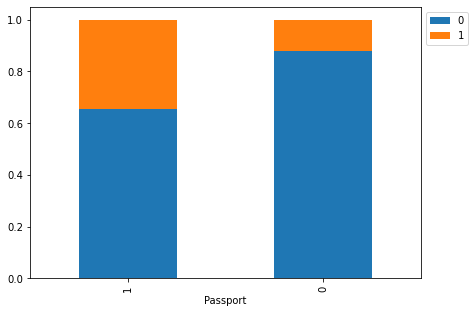

In [65]:
stacked_barplot(tourb, "Passport", "ProdTaken")

- it shows, that who have passport, has more chance to buy the product

##### Pitchsatisfactioscore with prodtaken

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


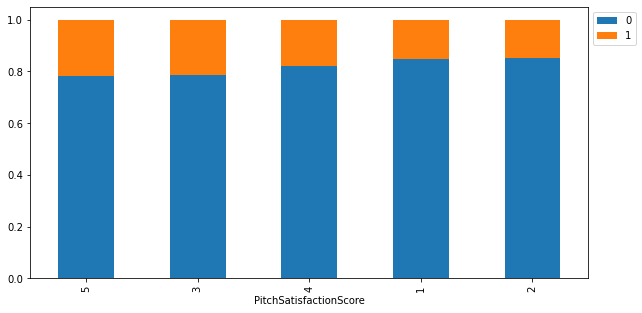

In [67]:
stacked_barplot(tourb, "PitchSatisfactionScore", "ProdTaken")

- there is also clear indication, who has better satisfaction score, more prone to buy

##### Own Car with Prodtaken

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


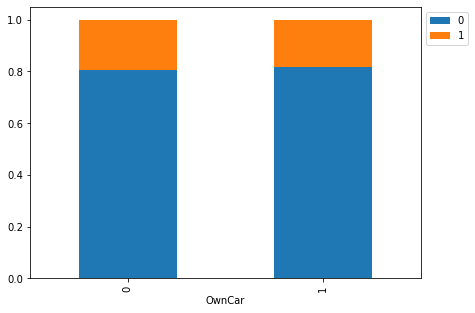

In [66]:
stacked_barplot(tourb, "OwnCar", "ProdTaken")

- Both categories are almost similar response. NO significant difference. 

##### Numberofchildrenvisiting with prodtaken

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


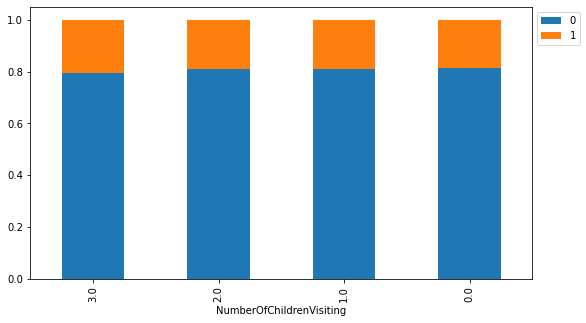

In [102]:
stacked_barplot(tourc, "NumberOfChildrenVisiting", "ProdTaken")

- almost very similar throughout all categories, the number of children visiting. 

##### Designation with prodtaken

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


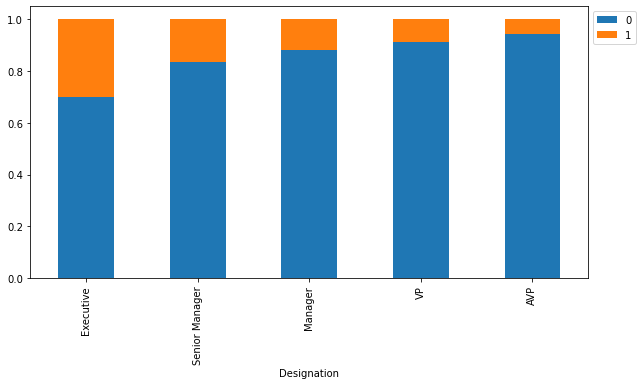

In [103]:
stacked_barplot(tourc, "Designation", "ProdTaken")

- Interestingly, executives have bought product more than the other categories.

# Summary of the findings from the EDA

Observations from Univariate Analysis:

- The data looks like almost normal
- There is no huge difference between highest and lowest values, except Monthly income and number of trips in theyear
- There are missing values in some features. However, in comparison with total number of observation, the percentage is very nonsignificant, only 5 percent.
- The distribution of age is normal. Mean age is inbetween 37 and 38. That is also perfect age for travelling, from two perspective, they have money, and also physically fit to travel
- Averagely 4 followups are made with the customers.
- Most of the contact made from customers than company initiative.
- Only 18 percent of people have bought the product among all respondents.
- 65 percent of respondents are from city tier 1
- Only 30 percent have passport
- 48 percent of respondents were married
- 30 percent has made 2 visits per year, which is the highest percentage from the data
- Property star 3 is mostly chosen as prefered proerty star from the respondents

Observations from Bivariate Analysis:
- IN correlation, there are moderate correlation between age and monthly income. Also there is relation between number of person visiting with number of children visiting.

- Male are more prone to buy the product than female, however, difference is not high
- Mostly people bought the product, when company has made the contact
- People from City Tier 3 have responsed more positively than others
- Single and unmarried people are more proned to buy the product, as they can take quick decision to travel compared to who have families
- Basic product categories has more appeal to the customers
- Number of followups have siginificant impact to make he decision to buy the product, more followups has influenced customer to buy the product
- however, pitch quality is not so good, which is visible in the satisfaction score, mostly have selected the neutral option
- having own car does not have any impact on the possibility of buying product
- having passport increases the possibilty to visit and thus to buy the travel product
- The people who visits more in a year, have more possibility to buy the product
- In case of Number of children, that does not vary by the number of children visiting
- Executive in the category of occupation has more possibilty to buy the product

# Preparing the Data

In [72]:
#Converting the object categories into categorical
for feature in tourb.columns:
    if tourb[feature].dtype == "object":
        tourb[feature] = pd.Categorical(tourb[feature])
tourb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   int64 

In [74]:
# Converting the other categories, which have datatype as integer
cat_columns=[
    "ProdTaken",
    "CityTier",
    "PreferredPropertyStar",
    "Passport",
    "PitchSatisfactionScore",
    "OwnCar"    
]

In [75]:
tourb[cat_columns]=tourb[cat_columns].astype("category")
tourb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [76]:
#Encoding the categorical values
replacestruct = {
    "TypeofContact": {"Self Enquiry": 1, "Company Invited": 2},
    "Gender": {"Male": 1, "Female": 2, "Fe Male": 3},
    "Occupation": {"Salaried": 1, "Small Business": 2, "Large Business": 3, "Free Lancer": 4},
    "ProductPitched": {"Basic": 1, "Deluxe": 2, "Standard": 3, "Super Deluxe": 4, "King": 5},
    "MaritalStatus": {"Married": 1, "Divorced": 2, "Single": 3, "Unmarried": 4},
    "Designation": {"Executive": 1, "Manager": 2, "Senior Manager": 3, "AVP": 4, "VP": 5}
}
tourb=tourb.replace(replacestruct)

#### Dealing with Missing Values, Imputation
- For the categorical variables, with mode, missing values are imputed
- For the numerical variables, with mean are generally selected
- However, where the continous variables are discrete in nature, for example, number of children are visiting, number of followups, also mode is chosen as imputation technique

In [77]:
#Typeofcontact missing values are imputed with mode
tourb['TypeofContact'] = tourb['TypeofContact'].fillna(tourb['TypeofContact'].mode()[0])

In [78]:
#Incase of Age, mean is selected to impute
tourb['Age'] = tourb['Age'].fillna(tourb['Age'].mean())

In [79]:
#Duration of pitch also imputed with mean
tourb['DurationOfPitch'] = tourb['DurationOfPitch'].fillna(tourb['DurationOfPitch'].mean())

In [80]:
#Number of followups imputed with mean
tourb['NumberOfFollowups'] = tourb['NumberOfFollowups'].fillna(tourb['NumberOfFollowups'].mean())

In [85]:
#Preferredpropertystar is imputed with mode
tourb['PreferredPropertyStar'] = tourb['PreferredPropertyStar'].fillna(tourb['PreferredPropertyStar'].mode()[0])

In [81]:
#Number of trips is imputes with mode
tourb['NumberOfTrips'] = tourb['NumberOfTrips'].fillna(tourb['NumberOfTrips'].mode()[0])

In [82]:
#Number of Children Visiting also imputed with mode
tourb['NumberOfChildrenVisiting'] = tourb['NumberOfChildrenVisiting'].fillna(tourb['NumberOfChildrenVisiting'].mode()[0])

In [83]:
#Though there are outliers, few of them very large in number. However as the mean, mode and median are almost very close, the mean is chosen to impute
tourb['MonthlyIncome'] = tourb['MonthlyIncome'].fillna(tourb['MonthlyIncome'].mean())

In [86]:
tourb.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

- There are no missing values

# Building the Model

In [87]:
# X and Y are declared
X = tourb.drop("ProdTaken" , axis=1)
y = tourb.pop("ProdTaken")

In [88]:
#Data are divided into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [89]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### - Which will be the best score?

- As companys main concern to bring new customer, however ensuring reduced marketing cost, the focus is more on precision, to reduce the amount of false positive
- Parallely, the focus also will be given on f1 score, to have a balance between precision and accuracy
- As the marketing cost we want to reduce and at the same time, we want to gain more customer, we will focus on having true positive, means to identify the real customer.
- Alternatively, that also implies, we have to make the amount of false positive minimum, so we don't loose budget on them, whom we are predicting customer, but they will not buy the product
- SO the precision will be our main concern
- However, we will also look at the f1 score to make balance between precision and recall

In [90]:
#Function to create different metrics score
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #f1 score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("f1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("f1 on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

# Bagging

In [92]:
#base_estimator.  Here, decision tree by default as bagging classifier
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [94]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9950306927798889
Accuracy on test set :  0.9107021131561008
Recall on training set :  0.9736024844720497
Recall on test set :  0.6014492753623188
Precision on training set :  1.0
Precision on test set :  0.8877005347593583
f1 on training set :  0.9866247049567269
f1 on test set :  0.717062634989201


- Prescion on train data has overfitted
- There is huge difference between f1 train and test score, as well as on recall also

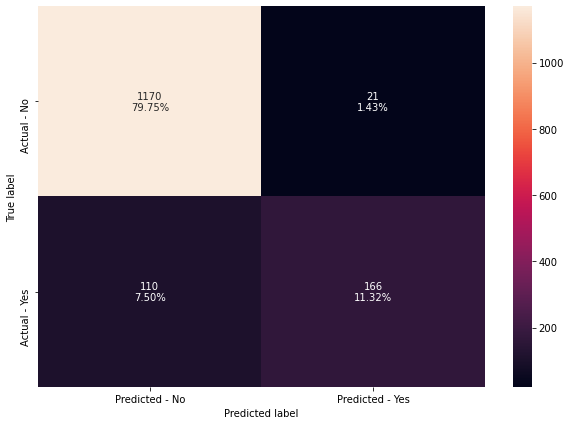

In [95]:
#confusion matrix of bagging
make_confusion_matrix(bagging_estimator,y_test)

##### Logistic Regression as a base estimator for bagging classifier

In [ ]:
#Logistic Regression as a base estimator for bagging classifier

In [96]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [97]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.8152586962876351
Accuracy on test set :  0.8166325835037491
Recall on training set :  0.021739130434782608
Recall on test set :  0.03260869565217391
Precision on training set :  0.875
Precision on test set :  0.8181818181818182
f1 on training set :  0.04242424242424243
f1 on test set :  0.0627177700348432


- Accuracy and precision score has improve significantly
- however recall and f1 are doing very poor
- in confusion matrix, model is able to reduce the number of false positive significantly

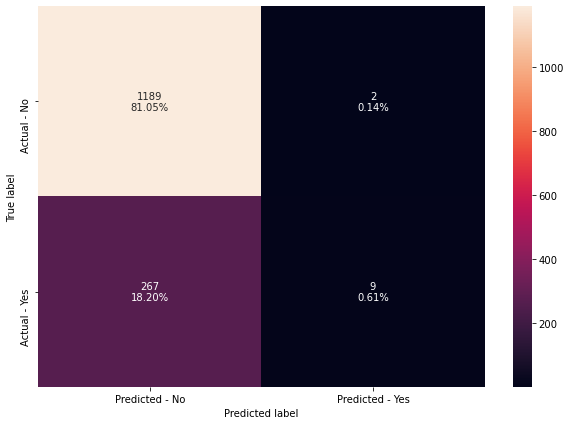

In [98]:
#confusion matrix on lr
make_confusion_matrix(bagging_lr,y_test)

##### Bagging classifier tuned

In [99]:
#Bagging classifier tuned
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Running the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

In [100]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9297886843899114
Recall on training set :  0.9968944099378882
Recall on test set :  0.6702898550724637
Precision on training set :  1.0
Precision on test set :  0.9390862944162437
f1 on training set :  0.9984447900466563
f1 on test set :  0.7822410147991543


- still model is suffering from overfitting in accuracy, recall on train data
- f1 also on train data, though the gap between train and test is reduced and overall the score has improved
- precision also suffering from overfitting
- in cm numer of false positive increased

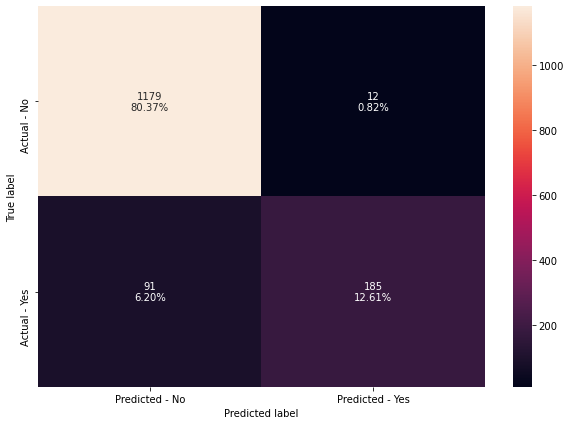

In [101]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

##### Random Forest Classifier

In [103]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [104]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9250170415814588
Recall on training set :  1.0
Recall on test set :  0.6485507246376812
Precision on training set :  1.0
Precision on test set :  0.9322916666666666
f1 on training set :  1.0
f1 on test set :  0.764957264957265


- in all metrics, train data is suffering from overfitting
- in cm, false positive has not improved

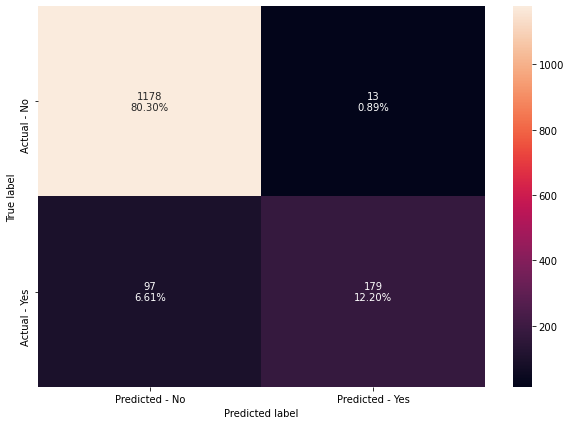

In [105]:
make_confusion_matrix(rf_estimator,y_test)

##### Weighted Random Forest

In [134]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       random_state=1)

In [135]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.9389067524115756
Accuracy on test set :  0.8861622358554874
Recall on training set :  0.7795031055900621
Recall on test set :  0.5543478260869565
Precision on training set :  0.8822495606326889
Precision on test set :  0.7766497461928934
f1 on training set :  0.827699917559769
f1 on test set :  0.6469344608879493


- Accuracy score has improved significantly
- Precision is better, however, the difference is little bit high among trian and test
- recall and f scores are not impressive
- False positive is not impressive


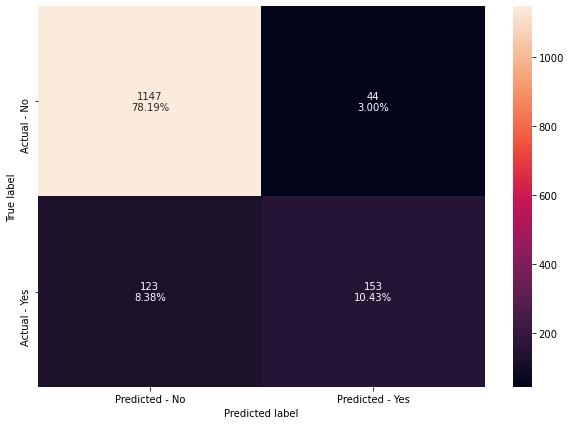

In [137]:
make_confusion_matrix(rf_estimator_weighted,y_test)

##### Random Forest Tuned

In [106]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [107]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9064600993861444
Accuracy on test set :  0.8779822767552828
Recall on training set :  0.546583850931677
Recall on test set :  0.4311594202898551
Precision on training set :  0.9263157894736842
Precision on test set :  0.8439716312056738
f1 on training set :  0.6875
f1 on test set :  0.5707434052757794


- accuracy and precision score has improved than without hypertuning
- however, the recall and f1 score is not good at all
- False positive number has increased more

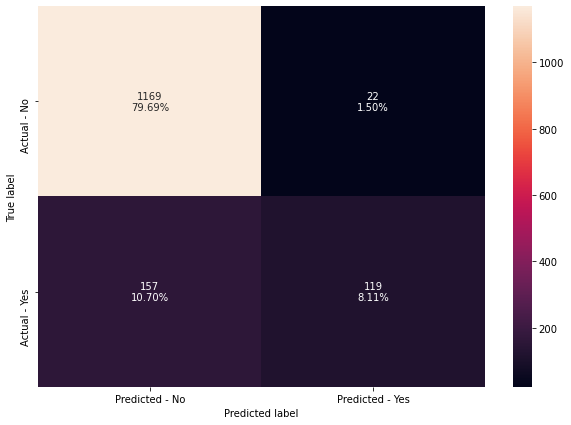

In [108]:
make_confusion_matrix(rf_estimator_tuned,y_test)

##### Feature Importance on Random Forest tuned

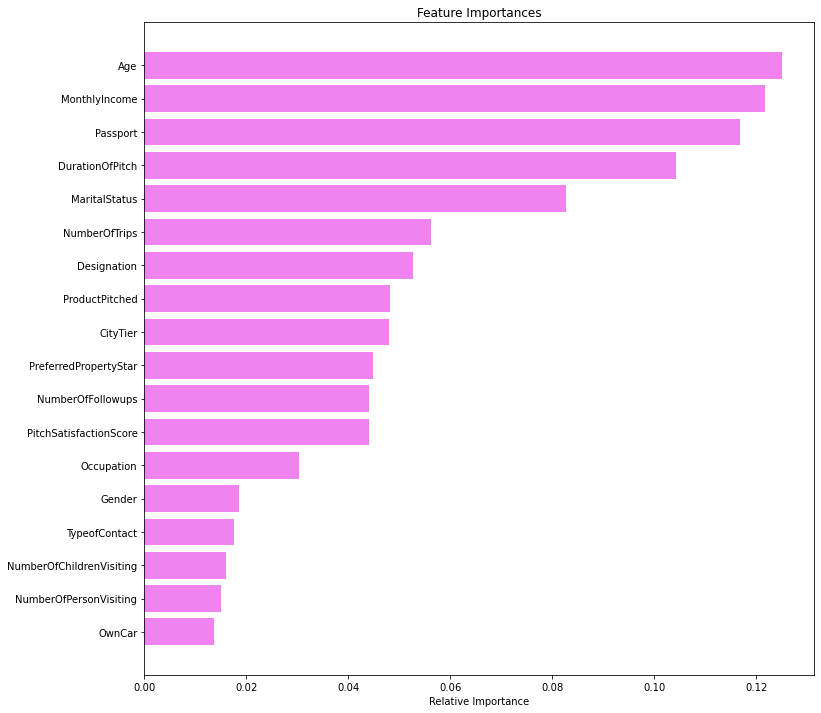

In [109]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- From Importances, we see, Age, Monthly Income, Passport, DurationofPitch and Marital Staus are significant features among all the availabel features

##### Decision Tree Classifier

In [111]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [112]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8997955010224948
Recall on training set :  1.0
Recall on test set :  0.75
Precision on training set :  1.0
Precision on test set :  0.7263157894736842
f1 on training set :  1.0
f1 on test set :  0.7379679144385027


- In all score categories, there are overfitting on the train data
- train and test score differences are high in all 
- False positive also doing really bad

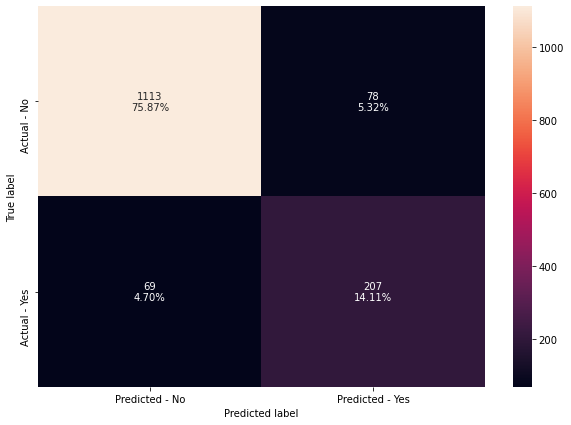

In [113]:
make_confusion_matrix(dtree,y_test)

##### Decision Tree Tuned

In [114]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=1)

In [115]:
dtree_score=get_metrics_score(dtree_tuned)

Accuracy on training set :  0.9964922537269805
Accuracy on test set :  0.8991138377641446
Recall on training set :  0.9860248447204969
Recall on test set :  0.75
Precision on training set :  0.9952978056426333
Precision on test set :  0.7237762237762237
f1 on training set :  0.9906396255850235
f1 on test set :  0.7366548042704626


- All scores nonsignificantly improved even after hypertuning
- Also false positive has not improved

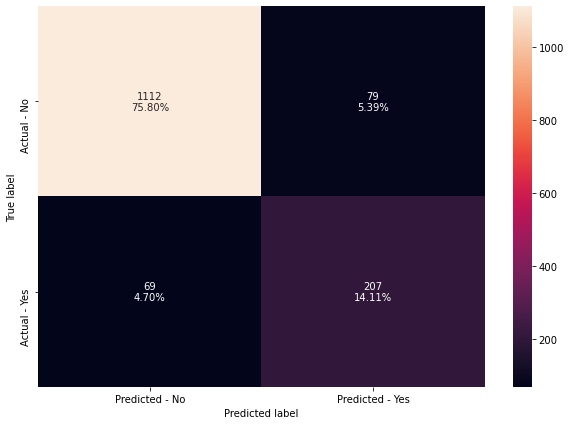

In [116]:
make_confusion_matrix(dtree_tuned, y_test)

##### Feature Importance Decision Tree

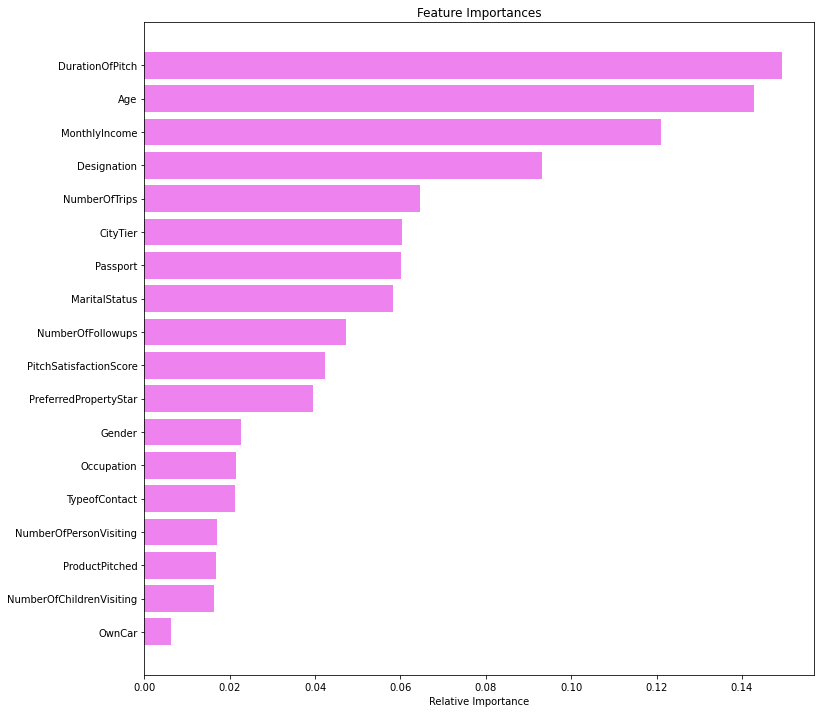

In [117]:
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Duration of Pitch is most important feature acording to this model
- Age, Monthly income and designation are other important features

# Boosting

##### Adaboosting

In [118]:
#Adaboosting 
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [119]:
# to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8465361005553932
Accuracy on test set :  0.8452624403544649
Recall on training set :  0.32919254658385094
Recall on test set :  0.31521739130434784
Precision on training set :  0.6950819672131148
Precision on test set :  0.696
f1 on training set :  0.4467860906217071
f1 on test set :  0.4339152119700748


- Only the Accuracy score has improved
- Precision score has also moderately better
- the number of false positive is also decreasd moderately
- however the overall performance is not good

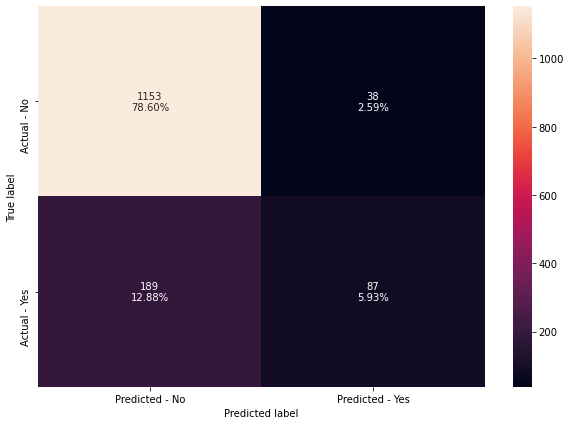

In [120]:
make_confusion_matrix(abc,y_test)

##### Adaboosting tuned

In [121]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.2000000000000002, n_estimators=90,
                   random_state=1)

In [122]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9847997661502484
Accuracy on test set :  0.880027266530334
Recall on training set :  0.9394409937888198
Recall on test set :  0.644927536231884
Precision on training set :  0.9789644012944984
Precision on test set :  0.6953125
f1 on training set :  0.9587955625990491
f1 on test set :  0.6691729323308271


- In accuracy, the score is better
- in recall there is big difference between train and test
- there is also big difference in precision and f1 score
- in cm false positive is very poor

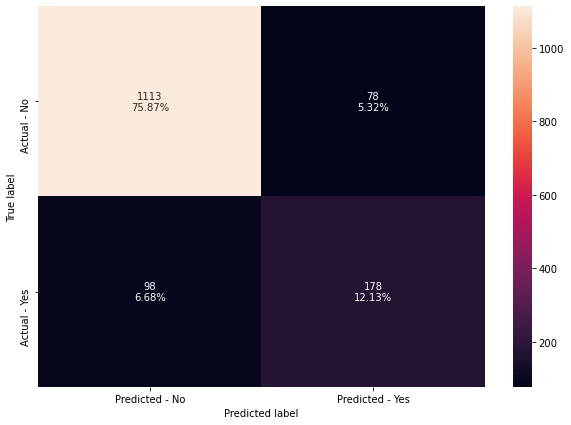

In [123]:
make_confusion_matrix(abc_tuned,y_test)

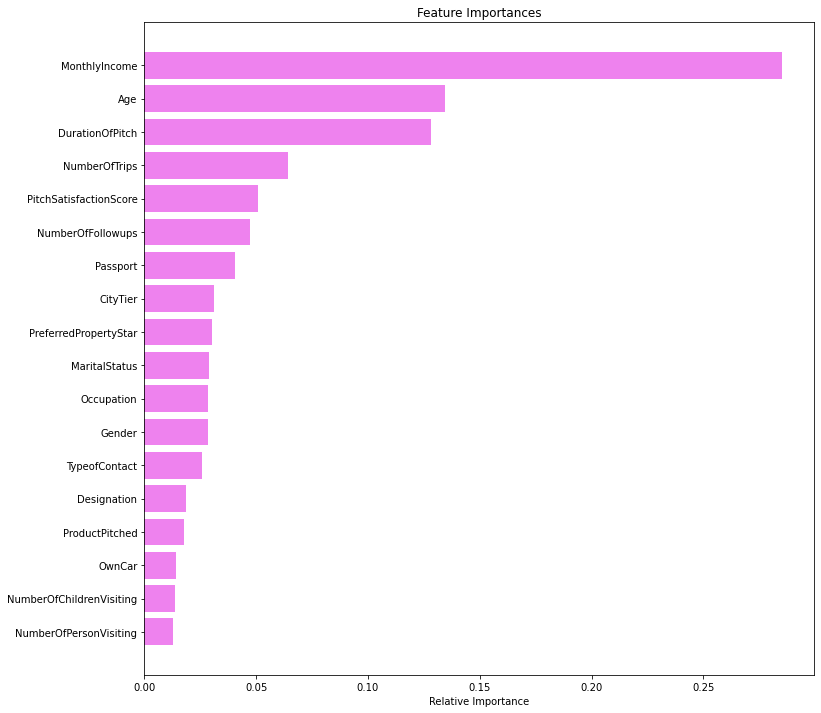

In [138]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- MOnthly INcome, Age and Duration of Pitch are the important features 

##### Gradient Boosting

In [124]:
# Performing the Gradient Boosting 
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [125]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8906752411575563
Accuracy on test set :  0.8698023176550784
Recall on training set :  0.4767080745341615
Recall on test set :  0.4057971014492754
Precision on training set :  0.8924418604651163
Precision on test set :  0.8057553956834532
f1 on training set :  0.6214574898785425
f1 on test set :  0.5397590361445784


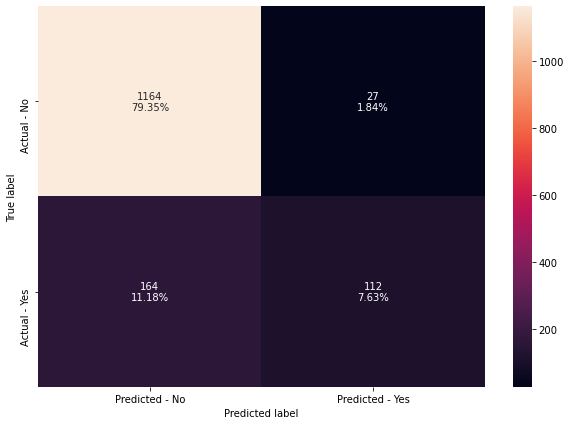

In [126]:
make_confusion_matrix(gbc,y_test)

##### Adaboosting as initial estimator for Gradient Boosting

In [127]:
#IN Gradientboosting taking adaboosting as init
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [128]:
#accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8886290558316282
Accuracy on test set :  0.8684389911383776
Recall on training set :  0.4658385093167702
Recall on test set :  0.39855072463768115
Precision on training set :  0.8902077151335311
Precision on test set :  0.8029197080291971
f1 on training set :  0.6116207951070336
f1 on test set :  0.5326876513317191


- Accuracy and Precision are stable as well
- and the recall and f1 scores are not impressive

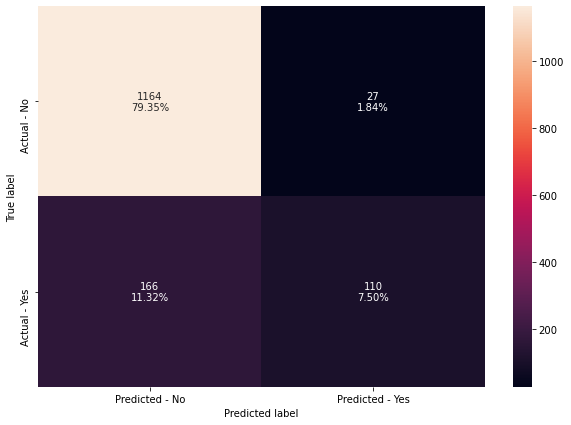

In [130]:
make_confusion_matrix(gbc_init, y_test)

##### Feature Importance Gradient with adaboosting as initial estimator

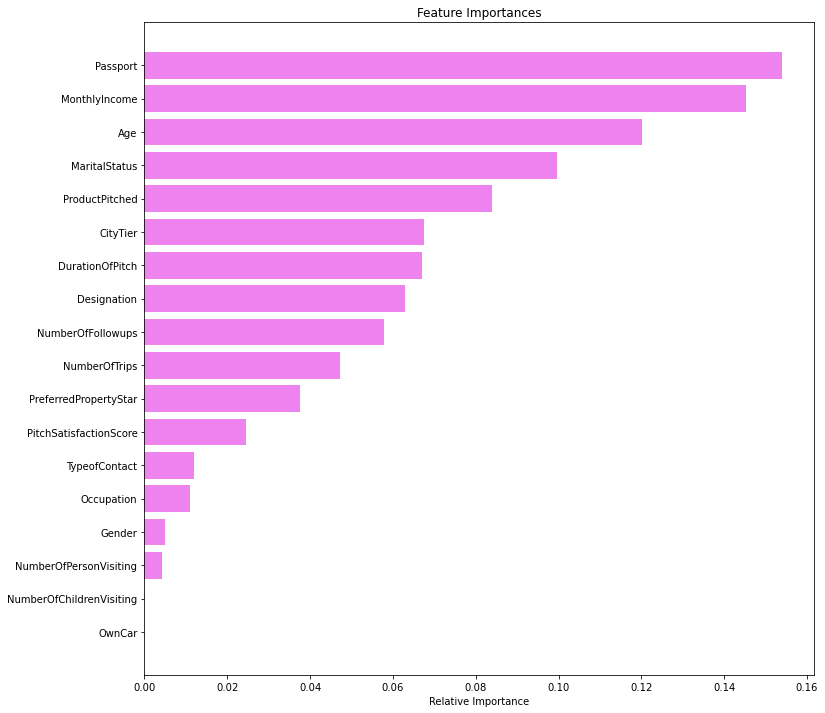

In [139]:
importances = gbc_init.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Here interestingly Passport is the most important feature 
- MOnthly income and age are other important variables as well
- Marital Status also taken as important variable in this model

##### Gradient Boosting tuned

In [131]:
#Hypertuning  with gradient boosting
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from

parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

In [132]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9228295819935691
Accuracy on test set :  0.8766189502385822
Recall on training set :  0.6273291925465838
Recall on test set :  0.47101449275362317
Precision on training set :  0.9439252336448598
Precision on test set :  0.7878787878787878
f1 on training set :  0.753731343283582
f1 on test set :  0.5895691609977324


- Accuracy as well as better
- NO changes in recall and in f1
- Precision has little bit decreased
- False Postive performence also decreased

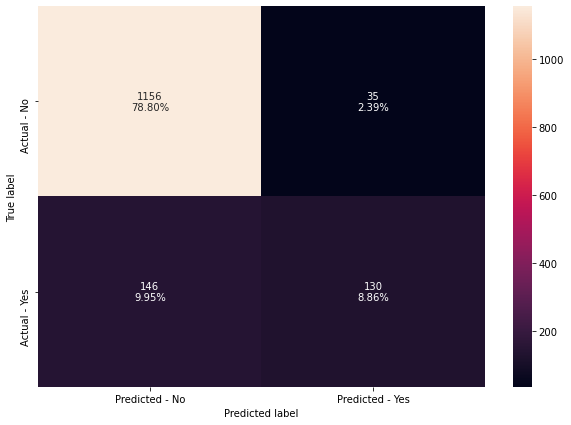

In [133]:
make_confusion_matrix(gbc_tuned,y_test)

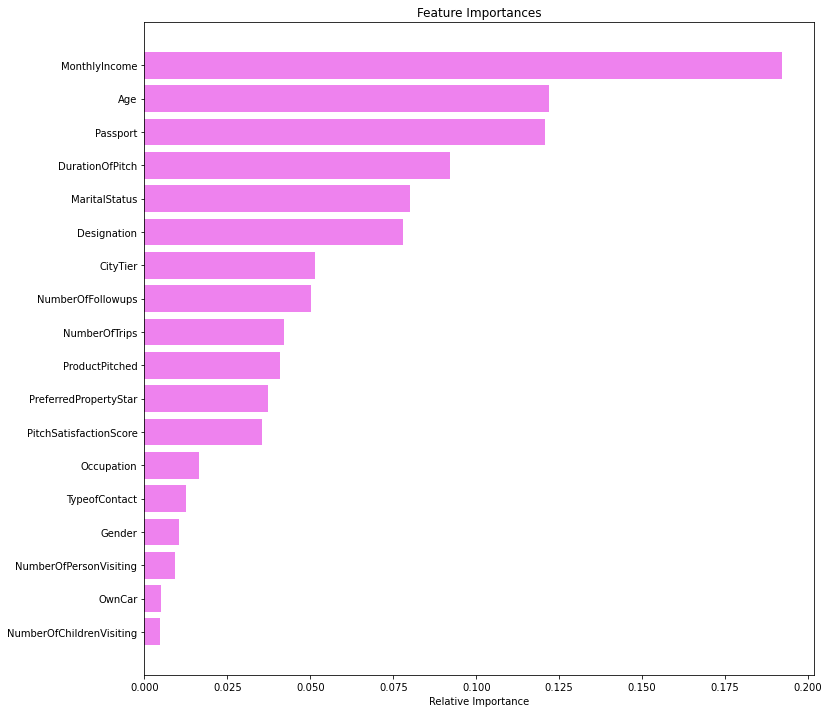

In [140]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- MOnthly Income, Age, Passport, Duration of Pitch, Marital Status are the important variables are considered
in this model

In [141]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_weighted,rf_estimator_tuned,dtree,dtree_tuned,abc,abc_tuned, gbc,gbc_init,gbc_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

In [142]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters','Weighted Random Forest',
                                         'Tuned Random Forest Classifier','Decision Tree','Decision Tree Tuned','Ada Boosting','Ada Boosting Tuned','Gradient Boosting','Gradient Boosting Init','Gradient Boosting Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                        'Train_f1':f1_train,'Test_f1':f1_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_f1,Test_f1
0,Bagging classifier with default parameters,1.00,0.91,0.97,0.60,1.00,0.89,0.99,0.72
1,Tuned Bagging Classifier,1.00,0.93,1.00,0.67,1.00,0.94,1.00,0.78
2,Bagging classifier with base_estimator=LR,0.82,0.82,0.02,0.03,0.88,0.82,0.04,0.06
3,Random Forest with deafult parameters,1.00,0.93,1.00,0.65,1.00,0.93,1.00,0.76
4,Weighted Random Forest,0.94,0.89,0.78,0.55,0.88,0.78,0.83,0.65
5,Tuned Random Forest Classifier,0.91,0.88,0.55,0.43,0.93,0.84,0.69,0.57
6,Decision Tree,1.00,0.90,1.00,0.75,1.00,0.73,1.00,0.74
7,Decision Tree Tuned,1.00,0.90,0.99,0.75,1.00,0.72,0.99,0.74
8,Ada Boosting,0.85,0.85,0.33,0.32,0.70,0.70,0.45,0.43
9,Ada Boosting Tuned,0.98,0.88,0.94,0.64,0.98,0.70,0.96,0.67


In [ ]:
- Gradient Boosting and Gradient Boosting INit are the best interms of precision score
- Bagging CLassifier with base estimator logistic regression, weighted random forest are other better model, giving the better score of presion test. 


# Recommendations and Conclusion


- From our above analysis, we find some important features and observations, that the company should implement in their future strategies:

- The important features are Age, Monthly Income, Duration of Pitch, Designation, etc. This is quite impressive findings, where the company should focus, people travel more in a certain age, when they are independent, and they have enough money, and they are physically fit to travel. That implies, the mid age is the time, when people usually, when they have affluency and as well as physical and mental stamina to travel a lot.

- To my opinion, Duration of pitch and number of follow ups, and quality of follow ups are also important to consider,as we find, there is a good relationship between number of follow ups and buying the product. Also form feature importance analysis, it is evident that duration of pitch also important, where should the company focus on.

- One important point connected with previous issue, company should also focus on recruiting quality sales people, as we see, there is positive impact of duration of pitch, follow ups etc. If they be able to recruit more quality sales people, the conversion rate will be high for the company. 

- It is also suggastable, the people who own passport, have the more possibility to travel and to buy the trave product. On the other hand having own car does not have much impact on taking the decision.

- Martital Status also needs to be considered. Specially, the unmarried, single persons are more ready to take travel than who are married or divorced. 

- City Tier 3 and 2 are better choice than city tier 1, thought the major number of respondents were form city tier 1. The company should target more people in city tier 1 and 2. 

- The company also should collect more information, about educational status, hobbies etc. to get more information and gain better insights in future. 


